In [256]:
import csv
import matplotlib.pyplot as plt
import json
from os import system
import numpy as np
import cmath

In [281]:
output_file_name = "../output.csv"
method = "RK"
omega = 0.1
beta = 0.01
dt = 0.01
x_0 = 0
v_0 = 0.1
simTime = 300

config = {"output_file_name": output_file_name,
          "method": method,
          "omega": omega,
          "beta": beta,
          "dt": dt,
          "x_0": x_0,
          "v_0": v_0,
          "simTime": simTime}
CONFIG_FILE_NAME = "../config.json"

In [282]:
t = []
x = {"E" : [], "H" : [], "RK" : []}
v = {"E" : [], "H" : [], "RK" : []}

In [283]:
def simulate(method : str):
    t.clear()
    x[method].clear()
    config["method"] = method
    with open(CONFIG_FILE_NAME, 'w') as c:
        json.dump(config, c)
    system("../main " + CONFIG_FILE_NAME)
    with open(config["output_file_name"], "r", newline="") as file:
        reader = csv.reader(file)
        for row in reader:
            t.append(float(row[0]))
            x[method].append(float(row[1]))
            v[method].append(float(row[2]))

In [284]:
simulate("E")
simulate("H")
simulate("RK")

In [296]:
# Theortical prediction


zeta = beta / (omega * 2)
# Roots of charactical equation
l1 = omega * (-zeta + cmath.sqrt((zeta) * (zeta) - 1))
l2 = omega * (-zeta - cmath.sqrt((zeta) * (zeta) - 1))
# Defining constants from start conditions
c2 = (v_0 - l1 * x_0) / (l2 - l1)
c1 = x_0 - c2

# Final result
x_theor = (c1 * np.exp(l1 * np.array(t)) + c2 * np.exp(l2 * np.array(t))).real
v_theor = (c1 * l1 * np.exp(l1 * np.array(t)) + c2 * l2 * np.exp(l2 * np.array(t))).real
E_theor = (1/2 * omega * omega * x_theor ** 2 + 1/2 * v_theor ** 2)



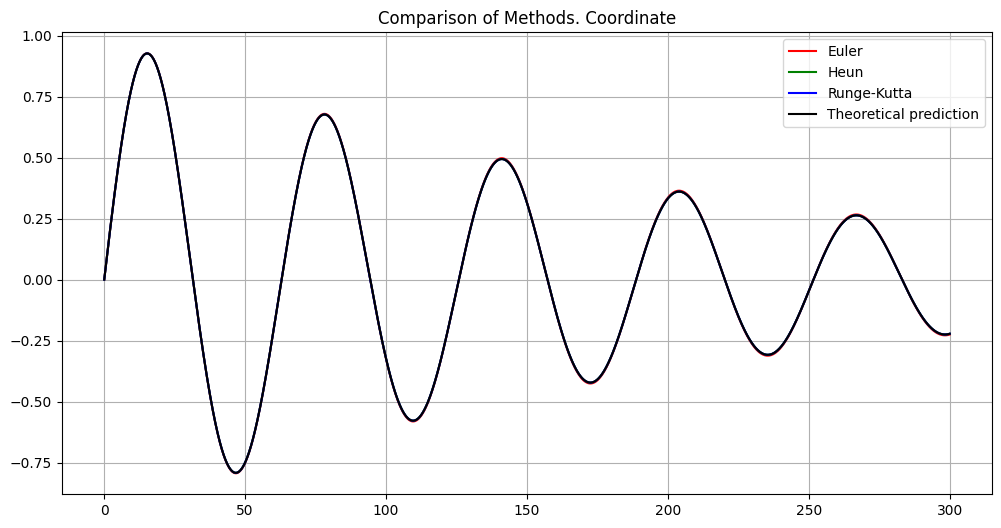

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [297]:
plt.figure(figsize=(12, 6))
plt.plot(t, x["E"], c='r', label='Euler')
plt.plot(t, x["H"], c='g', label='Heun')
plt.plot(t, x["RK"], c='b', label='Runge-Kutta')
plt.plot(t, x_theor, c = 'k', label='Theoretical prediction') 
plt.legend()
plt.grid(True)
plt.title('Comparison of Methods. Coordinate')
plt.show()
print(t)
print(x["RK"])

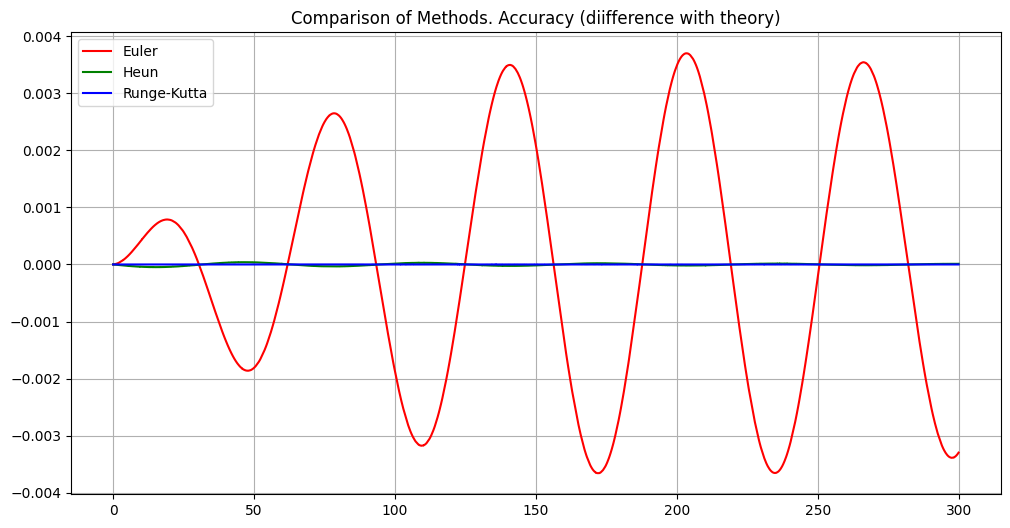

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [298]:
plt.figure(figsize=(12, 6))
plt.plot(t, x["E"] - x_theor, c='r', label='Euler')
plt.plot(t, x["H"] - x_theor, c='g', label='Heun')
plt.plot(t, x["RK"] - x_theor, c='b', label='Runge-Kutta')
plt.legend()
plt.grid(True)
plt.title('Comparison of Methods. Accuracy (diifference with theory)')
plt.show()
print(t)
print(x["RK"])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

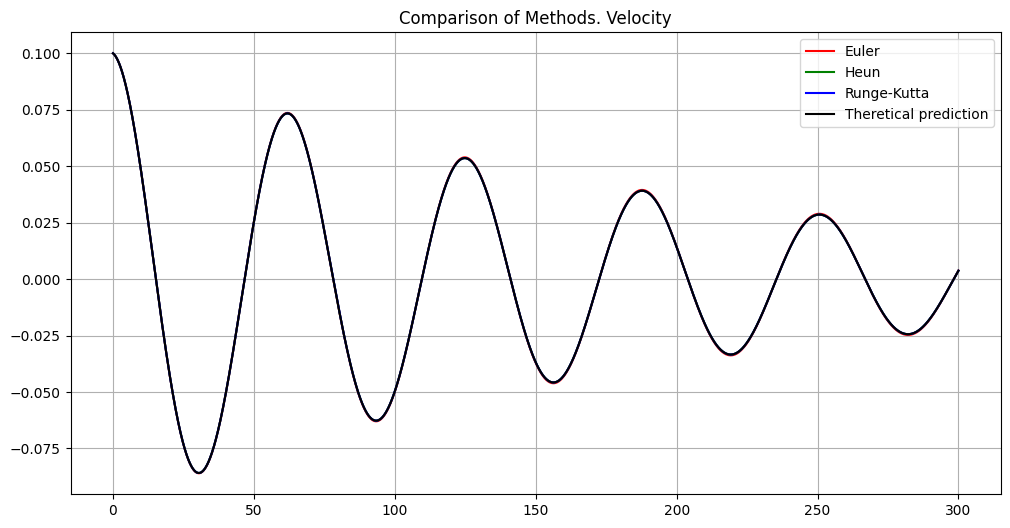

In [299]:
print(t)
print(v["RK"])
plt.figure(figsize=(12, 6))
plt.plot(t, v["E"], c='r', label='Euler')
plt.plot(t, v["H"], c='g', label='Heun')
plt.plot(t, v["RK"], c='b', label='Runge-Kutta')
plt.plot(t, v_theor, c='k', label='Theretical prediction')
plt.legend()
plt.grid(True)
plt.title('Comparison of Methods. Velocity')
plt.show()

In [300]:
E = {M : [(config['omega'])**2*x*x/2 + v*v/2 for x,v in zip(x[M], v[M])] for M in ["E", "H", "RK"]}

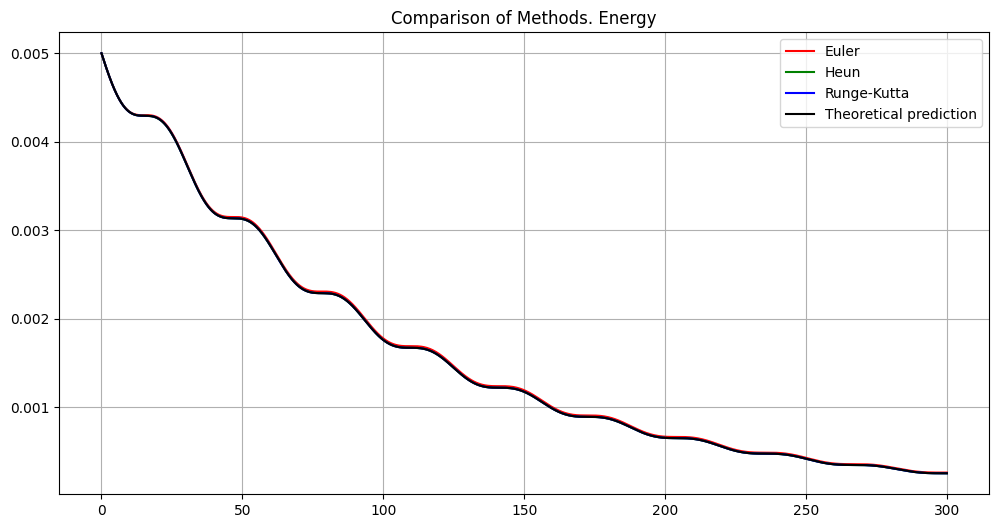

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [302]:
plt.figure(figsize=(12, 6))
plt.plot(t, E["E"], c='r', label='Euler')
plt.plot(t, E["H"], c='g', label='Heun')
plt.plot(t, E["RK"], c='b', label='Runge-Kutta')
plt.plot(t, E_theor, c='k', label='Theoretical prediction')

plt.legend()
plt.grid(True)
plt.title('Comparison of Methods. Energy')
plt.show()
print(t)
print(x["RK"])

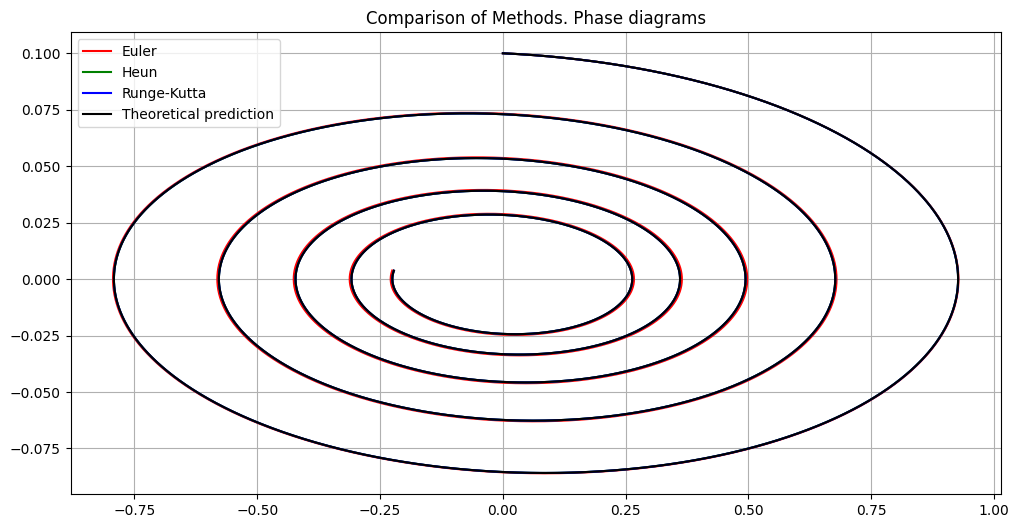

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [304]:
plt.figure(figsize=(12, 6))
plt.plot(x["E"], v["E"], c='r', label='Euler')
plt.plot(x["H"], v["H"], c='g', label='Heun')
plt.plot(x["RK"], v["RK"], c='b', label='Runge-Kutta') 
plt.plot(x_theor, v_theor, c='k', label='Theoretical prediction')

plt.legend()
plt.grid(True)
plt.title('Comparison of Methods. Phase diagrams')
plt.show()
print(t)
print(x["RK"])